
### AirBnb Project

```
Airbnb, Inc. is an American company that operates an online marketplace for lodging, primarily homestays for vacation rentals, and tourism activities. 
```


In [1]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
from IPython.display import display
import ipywidgets as widgets

from matplotlib import pyplot as plt

In [84]:
# Define Variables
roomPrice = 100
roomCount = 1
aviableDays = 30
occupanyRate = 0.6

cleaningFee = 50
unitBill = 5

#Fixed Cost
rent = 2500
maintainance = 500

contributionMargin = 100

In [79]:
try:
    roomPriceUI = widgets.IntSlider(
        value=100,
        min=0,
        max=500,
        step=1,
        description='Room Price:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='d')
    display(roomPriceUI)

    roomCountUI = widgets.IntSlider(
        value=2,
        min=0,
        max=50,
        step=1,
        description='Room Count:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='d')
    display(roomCountUI)

    availableDayUI = widgets.IntSlider(
        value=2,
        min=0,
        max=30,
        step=1,
        description='Available:',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='d')
    display(availableDayUI)

    occupanyUI = widgets.FloatSlider(
        value=0.6,
        min=0,
        max=1,
        step=0.01,
        description='Occup (%):',
        disabled=False,
        continuous_update=True,
        orientation='horizontal',
        readout=True,
        readout_format='.2f')
    display(occupanyUI)
except:
    print("Please Download the necessity libraries")

IntSlider(value=100, description='Room Price:', max=500)

IntSlider(value=2, description='Room Count:', max=50)

IntSlider(value=2, description='Available:', max=30)

FloatSlider(value=0.6, description='Occup (%):', max=1.0, step=0.01)

In [81]:
def calculateRevenue (roomPrice, roomCount, aviableDays, occupanyRate):
    revenue = roomPrice * roomCount * aviableDays * occupanyRate
    return revenue
    
def calculateVariableCost (roomCount, aviableDays, occupanyRate, cleaningFee, unitBill):
    variableCost = roomCount * aviableDays * occupanyRate *  (cleaningFee + unitBill)
    return variableCost

def calculateUnitCost (cleaningFee, unitBill):
    unitCost = (cleaningFee + unitBill)
    return unitCost

def calculateContributionMargin(price,unitCost):
    return price - unitCost
    
def calculateFixedCost (rent, maintainance):
    return rent+maintainance

def calculateProfit(c1, c2, c3):
    return c1 - c2 - c3

def calculateBreakEvenPoint(c1, c2, c3):
    try:
        return c3/(c1-c2) #fixed cost/(unit revenue - unit variable cost) & ours is calculated based on 1 month
    except ZeroDivisionError:
        print("Break even is undefined!!")
        return 0.00

def report(revenue,varCost,fixCost,profit,breakEven):
    breakEvenStr = "{:.2f}".format(breakEven)
    print(f"Revenue: {revenue} tl")
    print(f"Variable Cost: {varCost} tl")
    print(f"Ficed Cost: {fixCost} tl")
    print(f"Profit: {profit} tl")
    print(f"BreakEven Point: {breakEvenStr} months")
    


def updateVariables():
    roomPrice    = roomPriceUI.value
    roomCount    = roomCountUI.value
    aviableDays  = availableDayUI.value
    occupanyRate = occupanyUI.value
    varCost = calculateUnitCost(cleaningFee, unitBill)
    contributionMargin = calculateContributionMargin(roomPrice,varCost)

def main():
    updateVariables()
    rev = calculateRevenue(roomPrice, roomCount, aviableDays, occupanyRate)
    varCost = calculateVariableCost (roomCount, aviableDays, occupanyRate, cleaningFee, unitBill)
    fixCost = calculateFixedCost (rent, maintainance)
    prof = calculateProfit (rev, varCost,fixCost)
    breakEven = calculateBreakEvenPoint (rev,varCost, fixCost)
    report(rev,varCost,fixCost,prof,breakEven)
    

    

In [82]:
main()


Revenue: 1800.0 tl
Variable Cost: 990.0 tl
Ficed Cost: 3000 tl
Profit: -2190.0 tl
BreakEven Point: 3.70 months


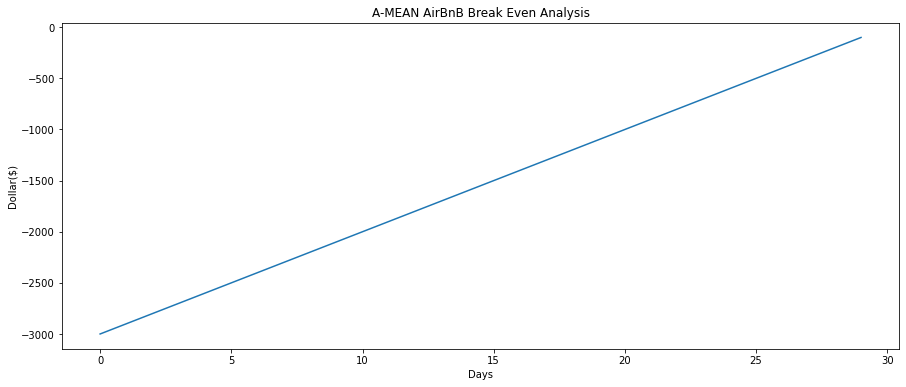

In [85]:
def breakEvenGraph(CM,fixedCost):

    CM_list = [(fixedCost * -1)]
    for day in range(1,30):
        CM_list.append(CM_list[day-1] + CM)
    
    plt.figure(figsize=(15,6))
    plt.plot(CM_list)
    
    plt.title("A-MEAN AirBnB Break Even Analysis")
    plt.xlabel("Days")
    plt.ylabel("Dollar($)")

    plt.show()

    
breakEvenGraph(contributionMargin,fixCost)
saveReport()

